# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_type_df=pyber_data_df.groupby('type')

type_ride_count=city_type_df['ride_id'].count()

In [4]:
# 2. Get the total drivers for each city type
# Need to use only city_data_df, not merged pyber_data_df. 
# If using merged df then it sums driver counts for every ride (i.e. Amandasburgh driver count gets included 18 times for the 18 rides in that city)
type_driver_count = city_data_df.groupby('type')['driver_count'].sum()

# There is likely a way to do this with pyber_data_df, counting from only 'unique' city name strings, but would have to be careful not to do it based on driver count since multiple cities could have same driver count.

In [5]:
#  3. Get the total amount of fares for each city type
type_fares_total=city_type_df['fare'].sum()

In [6]:
#  4. Get the average fare per ride for each city type. 
# alt method: type_fares_average = city_type_df['fare'].mean()
type_fares_average = type_fares_total/type_ride_count

In [7]:
# 5. Get the average fare per driver for each city type. 
type_driver_average = type_fares_total/type_driver_count

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({'Total Rides':type_ride_count
                              ,'Total Drivers': type_driver_count
                              ,'Total Fares':type_fares_total
                              ,'Average Fare Per Ride':type_fares_average
                              ,'Average Fare Per Driver':type_driver_average})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides']=pyber_summary_df['Total Rides'].map('{:,.0f}'.format)
pyber_summary_df['Total Drivers']=pyber_summary_df['Total Drivers'].map('{:,.0f}'.format)
pyber_summary_df['Total Fares']= pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare Per Ride']=pyber_summary_df['Average Fare Per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare Per Driver']=pyber_summary_df['Average Fare Per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 0. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type_df=pyber_data_df.groupby(['type','date']).sum()['fare']

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
date_type_df = date_type_df.reset_index()

In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type_pivot=date_type_df.pivot(index='date',columns='type',values='fare')

date_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_type_pivot.index=pd.to_datetime(date_type_pivot.index)
date_type_pivot.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-05-07 20:05:15', '2019-05-07 20:22:19',
               '2019-05-07 20:40:29', '2019-05-08 01:54:18',
               '2019-05-08 02:31:25', '2019-05-08 04:20:00',
               '2019-05-08 04:39:49', '2019-05-08 07:29:01',
               '2019-05-08 11:38:35', '2019-05-08 13:10:18'],
              dtype='datetime64[ns]', name='date', length=2375, freq=None)

In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_df=date_type_pivot.loc[(date_type_pivot.index >= '2019-1-1') & (date_type_pivot.index <= '2019-4-29')]

In [17]:
# 6. Check that the datatype for the index is datetime using df.info()
jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_total_weekly = jan_apr_df.resample('W').sum()
fare_total_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [19]:
fare_average_weekly = jan_apr_df.resample('W').mean()
fare_average_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,37.584000,32.800000,25.176970
2019-01-13,22.550000,31.575143,25.630375
2019-01-20,38.250000,29.712195,23.083571
2019-01-27,29.948333,35.390588,25.351310
2019-02-03,37.008889,32.587187,23.715227
2019-02-10,28.950000,31.430323,23.006809
2019-02-17,31.940000,30.750000,25.989186
2019-02-24,38.096364,32.854419,23.944563
2019-03-03,35.028000,28.615333,25.206818


In [20]:
x_axis = fare_total_weekly.index
y_axis_Rural = fare_total_weekly['Rural']
y_axis_Suburban = fare_total_weekly['Suburban']
y_axis_Urban = fare_total_weekly['Urban']

In [21]:
x_axis = fare_average_weekly.index
average_y_axis_Rural = fare_average_weekly['Rural']
average_y_axis_Suburban = fare_average_weekly['Suburban']
average_y_axis_Urban = fare_average_weekly['Urban']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


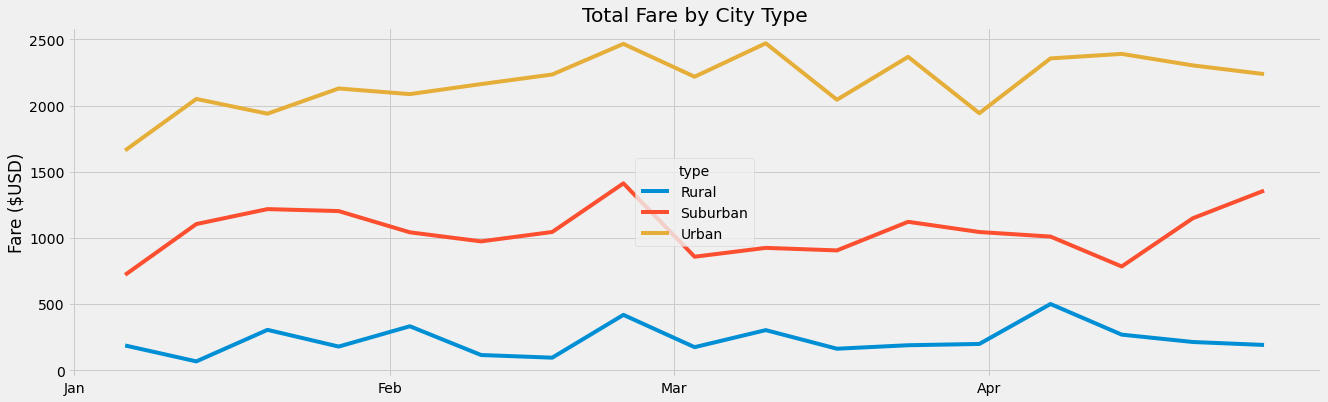

In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
xlabels=['Jan','Feb','Mar','Apr']

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x_axis,y_axis_Rural)
ax.plot(x_axis,y_axis_Suburban)
ax.plot(x_axis,y_axis_Urban)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,2,3,4)))
ax.grid(True)


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax.set_xticklabels(xlabels)
ax.set_ylabel('Fare ($USD)')


ax.legend(['Rural','Suburban','Urban'],title='type',loc='center')
ax.set_title('Total Fare by City Type')

plt.savefig('analysis/PyBer_fare_summary.png')

plt.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


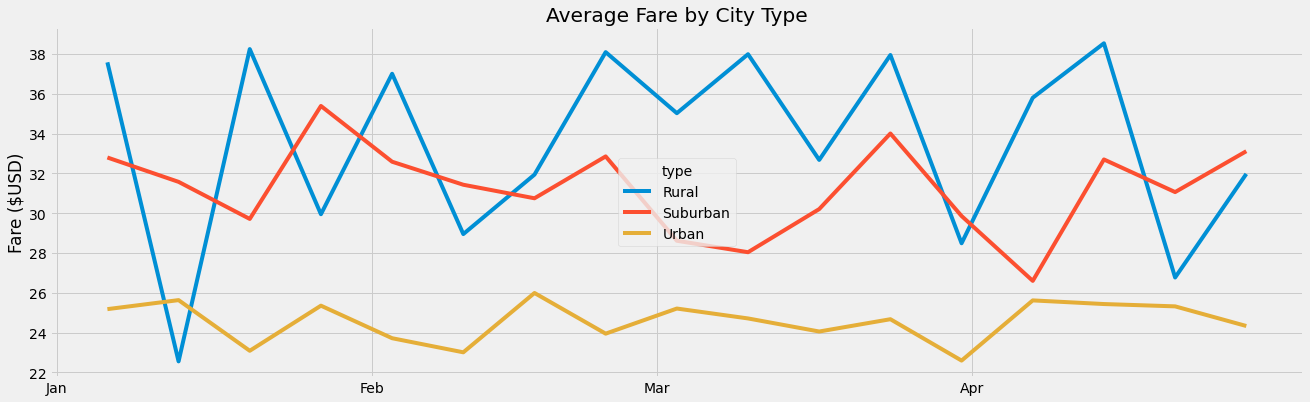

In [25]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x_axis,average_y_axis_Rural)
ax.plot(x_axis,average_y_axis_Suburban)
ax.plot(x_axis,average_y_axis_Urban)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,2,3,4)))
ax.grid(True)


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax.set_xticklabels(xlabels)
ax.set_ylabel('Fare ($USD)')


ax.legend(['Rural','Suburban','Urban'],title='type',loc='center')
ax.set_title('Average Fare by City Type')

plt.savefig('analysis/PyBer_average_fare_summary.png')

plt.show()